# Objective: 
Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.
## Context: 
Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities. 


## Exploratory Data Analysis

In [1]:
# Import packages to use in EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy.stats import zscore

In [2]:
# Import data into pandas dataframe
data_og = pd.read_csv('bank.csv')

In [3]:
# Check number of columns in dataframe, 13 are dependent variables with 1 dependent variable "Exited"
# Check number of records in the data, which is 10000
data_og.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
# Print first 5 rows of the data
data_og.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Feature Elimination

In [5]:
for i in data_og.columns:
    print('{} number of unique values is {}'.format(data_og[i].name, data_og[i].nunique()))

RowNumber number of unique values is 10000
CustomerId number of unique values is 10000
Surname number of unique values is 2932
CreditScore number of unique values is 460
Geography number of unique values is 3
Gender number of unique values is 2
Age number of unique values is 70
Tenure number of unique values is 11
Balance number of unique values is 6382
NumOfProducts number of unique values is 4
HasCrCard number of unique values is 2
IsActiveMember number of unique values is 2
EstimatedSalary number of unique values is 9999
Exited number of unique values is 2


#### Drop columns RowNumber & CustomerId which are unique identifiers for the records

In [6]:
data_og = data_og.drop(['RowNumber', 'CustomerId','Surname'], axis=1, inplace=False)

In [7]:
data_og.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [8]:
# Check for NULL values, which there are none
data_og.isnull().values.any()

False

In [9]:
# Check for duplicate records, which there are none
data_og.duplicated().sum()

0

In [10]:
# Descriptive Stats of the variables
data_og.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


0    0.7963
1    0.2037
Name: Exited, dtype: float64


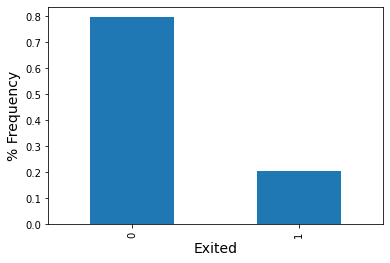

---------
France     0.5014
Germany    0.2509
Spain      0.2477
Name: Geography, dtype: float64


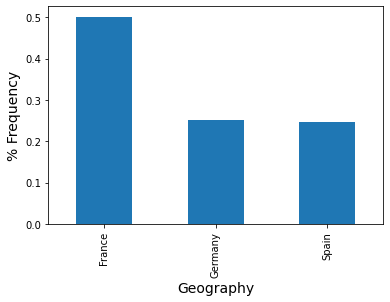

---------


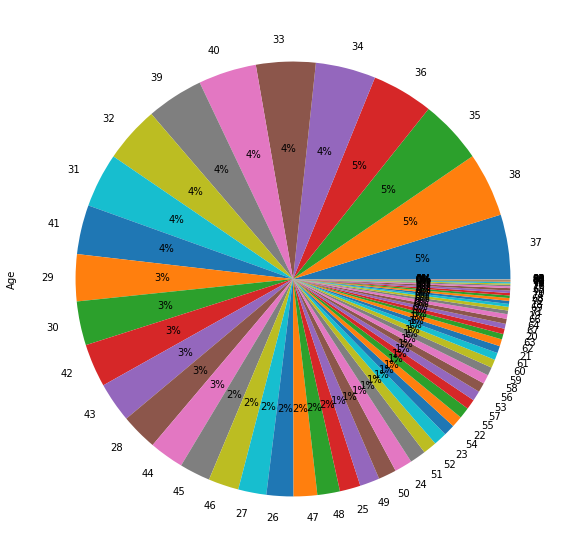

---------


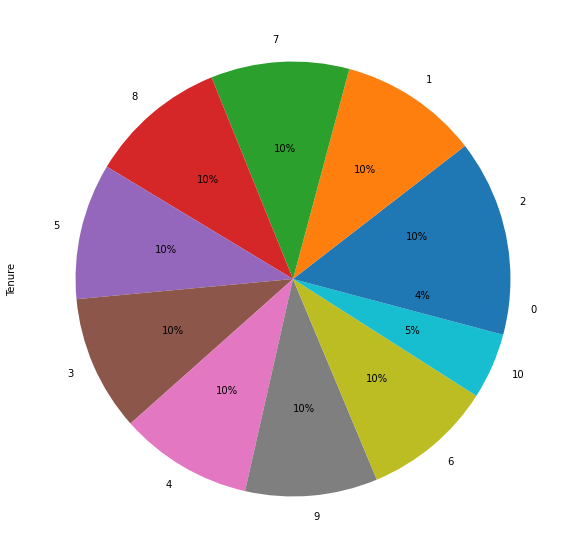

---------
1    0.5084
2    0.4590
3    0.0266
4    0.0060
Name: NumOfProducts, dtype: float64


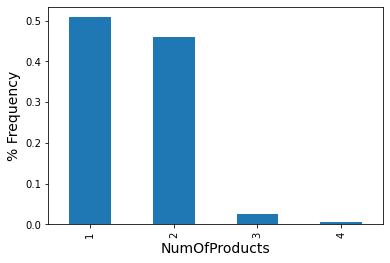

---------
1    0.7055
0    0.2945
Name: HasCrCard, dtype: float64


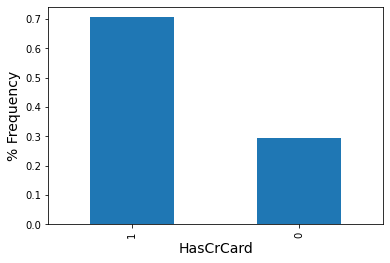

---------
1    0.5151
0    0.4849
Name: IsActiveMember, dtype: float64


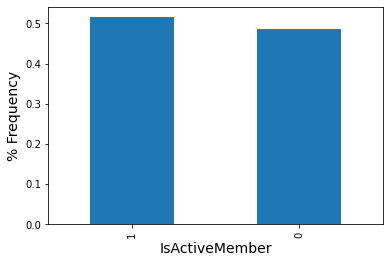

---------


In [11]:
# Plot Pie and Bar charts for independent variables
for i in data_og[['Exited','Geography','Age','Tenure','NumOfProducts','HasCrCard','IsActiveMember']].columns:
    if (data_og[i].unique().shape[0] <= 10):
        print(data_og[i].value_counts(ascending=False, normalize=True))
        data_og[i].value_counts(ascending=False, normalize=True).plot(kind='bar')
        plt.ylabel('% Frequency', fontsize=14)
        plt.xlabel(data_og[i].name, fontsize=14)
    else:
        data_og[i].value_counts(ascending=False, normalize=True).plot(kind='pie',autopct='%1.0f%%',figsize=(10, 10))
    plt.show()
    print('---------')

#### Analysis of univariate
- 79.6% of customers existed the bank, while 20.4% stayed after 6 months
- Most customers are between ages 30-40 years old
- Tenure for customer is 10% each of 1-9 years, with 4% for 0 years and 5% for 10 years
- Majority of customers have 1 product (50.8%) and 2 products (15.9%)
- 70% of customers have 1 credit card, while the rest have none
- 51.5% are active members, while 48.5 are not active
- Half of customers are from France, while a quarter are from each of Germany and Spain

## Bivariate Exploratory Data Analysis

#### Create new DataFrame "data" with Geography converted to digits Geo_Tmp

In [12]:
data = data_og.copy()
data['Geo_Tmp'] = data['Geography'].replace(['France','Germany','Spain'], [1, 2, 3])
data['Gender_Tmp'] = data['Gender'].replace(['Male','Female'], [0, 1])

In [13]:
# Plotting pair plots of independent variables with a hue of the "Exited" dependent variable
#sns.pairplot(data, hue='Exited');

In [14]:
# CrossTab of categorical variables
for i in data[['Exited']].columns:
    for j in data[['HasCrCard','Gender','Geography']].columns:
        if (i != j):
            print(pd.crosstab(data[i], data[j]))
            print('---------')           

HasCrCard     0     1
Exited               
0          2332  5631
1           613  1424
---------
Gender  Female  Male
Exited              
0         3404  4559
1         1139   898
---------
Geography  France  Germany  Spain
Exited                           
0            4204     1695   2064
1             810      814    413
---------


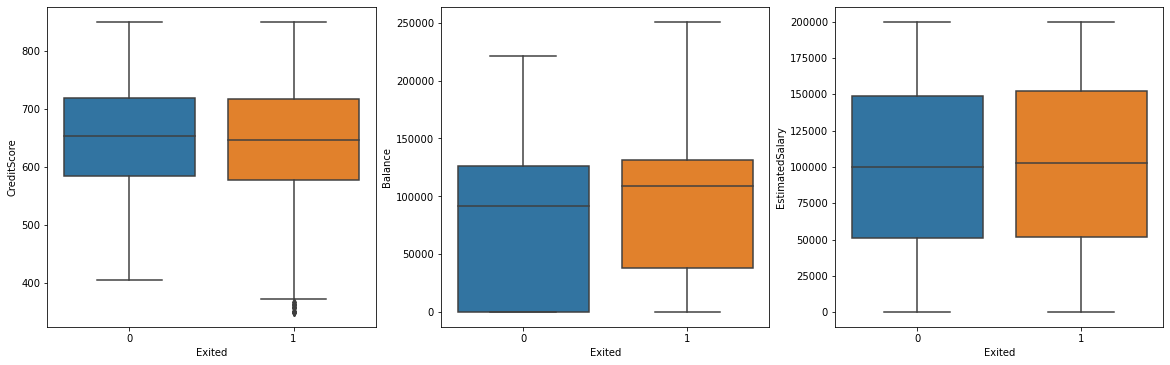

In [15]:
# Box Plots to show distribution of Continuous dependant variables with respect to Exited
plt.figure(figsize=(20, 20))
p = 1
for i in data[['CreditScore', 'Balance', 'EstimatedSalary']].columns:
    plt.subplot(3, 3, p)
    sns.boxplot(x='Exited', y=data[i], data=data)
    p += 1 

#### Insights from Pairplot & CrossTab
- Age - average age for those who exited is higher than those who stayed
- Balance - the balance distribution shows two gaussians for those who stayed and those who exited. Those who stayed have more clients with a lower balance, than those with a higher balance. Those who exited have more clients with a higher balance than those with a lower balance
- NumOfProducts - clients who stayed mostly have 1 or 2 products, while those who left mostly have 1 product as well a few who had 2/3/4 products
- HasCrCard - double the customers have 1 credit card compared to 0 credit cards, whether they exited (1424:613) or not (5631:2332)
- Geography - 19.3% of France customers existed (810/4204), 48% of German customers existed (814/1695) and 20% of France customers existed (413/2064)
- Gender - 33.5% of Female customers exited(1139/3404), while 19.7% of Male customers exited (898/4559)
- IsActiveMember - Group of clients that exited have double the inactive members (1302) compared to active members (735). Clients that stayed have slightly more active members (4416) than inactive members (3547)
- EstimatedSalary, Tenure, CreditScore - these independent variables do not distinguish between clients who exited and those who stayed

#### Insights from BoxPlot
- CreditScore - customers with credit score below 400 exited the bank
- EstimatedSalary - does not distinguish between clients who exited and those who stayed

In [16]:
# Drop Geo_Tmp & Gender_Tmp
data.drop(columns=['Geo_Tmp'], inplace=True, axis=1)
data.drop(columns=['Gender_Tmp'], inplace=True, axis=1)

# One-Hot Encoding of Geography & Gender
data = pd.get_dummies(data, columns=['Gender'], drop_first=True)
data = pd.get_dummies(data, columns=['Geography'], drop_first=False)

data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,0,1


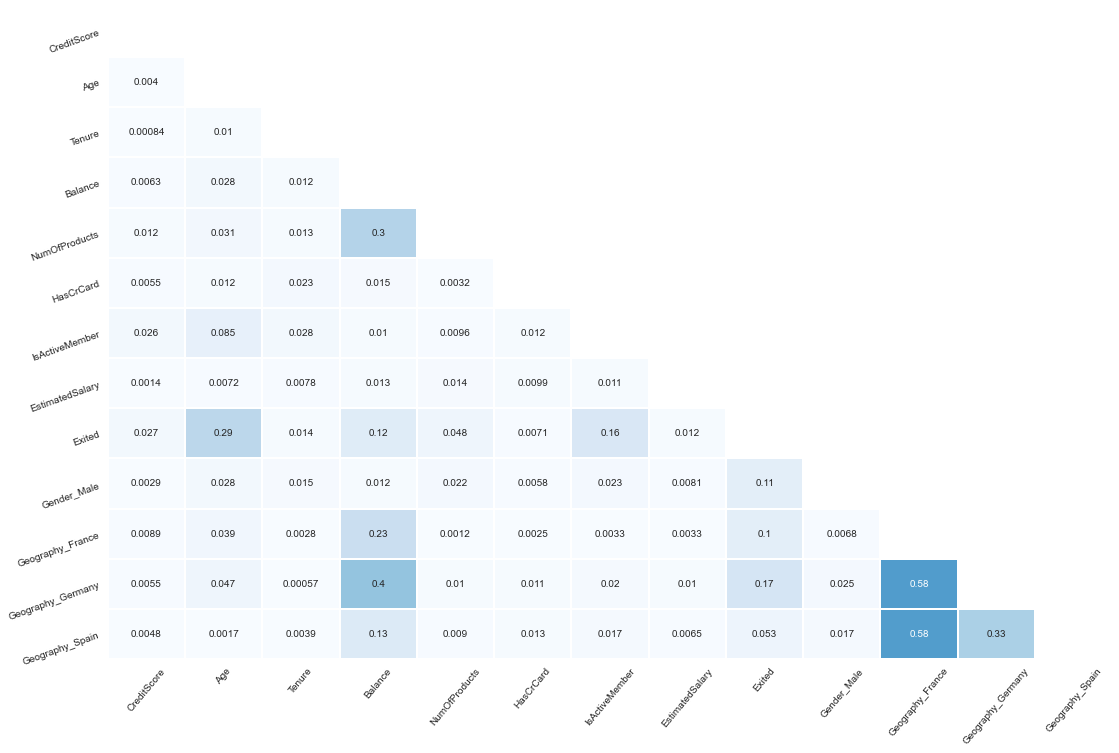

In [17]:
corr = abs(data.corr()) # correlation matrix
lower_triangle = np.tril(corr, k = -1)  # select only the lower triangle of the correlation matrix
mask = lower_triangle == 0  # to mask the upper triangle in the following heatmap

plt.figure(figsize = (18,12))  # setting the figure size
sns.set_style(style = 'white')  # Setting it to white so that we do not see the grid lines
sns.heatmap(lower_triangle, center=0.5, cmap= 'Blues', annot= True, xticklabels = corr.index, yticklabels = corr.columns,
            cbar= False, linewidths= 1, mask = mask)   # Da Heatmap
plt.xticks(rotation = 50)   # Aesthetic purposes
plt.yticks(rotation = 20)   # Aesthetic purposes
plt.show()

#### Insights from Correlation HeatMap
- The remaining independent variables have no correlation between them

## Data Split

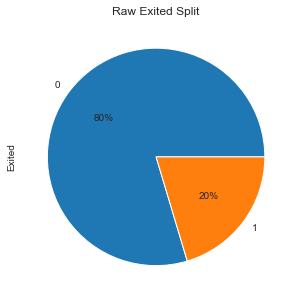

In [18]:
data['Exited'].value_counts(ascending=False).plot(kind='pie',autopct='%1.0f%%',figsize=(5, 5), title='Raw Exited Split')

#### Train, Test & Validation matrices (raw data):
- Training Raw data: X0_train, y0_train
- Validation Raw data: X0_valid, y0_valid
- Cross Validation Raw data: X1_train, y_train
- Test Raw Data: X1_test, y_test

#### Train, Test & Validation matrices (scaled data):

- Training Scaled data: X0_train1
- Validation Scaled data: X0_valid1
- Training Scaled data for Final Model: X1_train1
- Test Scaled Data: X1_test

In [19]:
# Create matrix X1 and y
y = data['Exited']
X1 = data.drop(['Exited'], axis=1, inplace=False)
X1.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,0,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,0,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [20]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [21]:
# Generate and store Train & Testing data: X1_train, X1_test
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=3)

In [22]:
# Generate and store Train & Validation data: X0_train, X0_valid
X0_train, X0_valid, y0_train, y0_valid = train_test_split(X1_train, y_train, test_size=0.3, random_state=3)

In [23]:
X1_train.shape, X1_test.shape, y_train.shape, y_test.shape

((7000, 12), (3000, 12), (7000,), (3000,))

#### Review balance state of dependant variable in train and test data
- Equal split ratio of 0 & 1 classes, in train, validation and test data

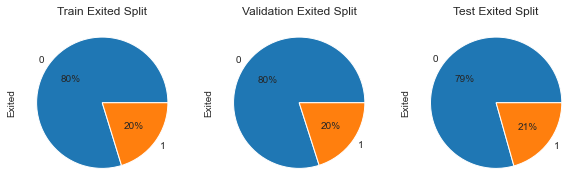

In [24]:
plt.subplot(1, 3, 1, title='Train Exited Split')
y_train.value_counts(ascending=False).plot(kind='pie',autopct='%1.0f%%',figsize=(10, 10))
plt.subplot(1, 3, 2, title='Validation Exited Split')
y0_train.value_counts(ascending=False).plot(kind='pie',autopct='%1.0f%%',figsize=(10, 10))
plt.subplot(1, 3, 3, title='Test Exited Split')
y_test.value_counts(ascending=False).plot(kind='pie',autopct='%1.0f%%',figsize=(10, 10))

## Normalization

In [25]:
X1_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
5795,709,39,8,0.00,2,1,0,56214.09,1,1,0,0
1490,797,31,8,0.00,2,1,0,117916.63,0,0,0,1
3807,470,30,3,101140.76,1,1,1,50906.65,1,1,0,0
3042,835,29,10,130420.20,2,0,0,106276.55,0,0,1,0
4064,626,39,10,132287.92,3,1,1,51467.92,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6400,676,30,5,0.00,2,0,0,179066.58,0,0,0,1
9160,778,24,4,0.00,2,1,1,162809.20,1,1,0,0
9859,678,55,4,129646.91,1,1,1,184125.10,1,0,1,0
1688,601,41,1,0.00,2,0,1,160607.06,0,1,0,0


In [26]:
# Review of dataframe before scaling data using zscore
X1_train.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,650.764286,38.854571,5.007571,76307.841974,1.531286,0.703286,0.513286,99459.704037,0.544714,0.502000,0.254714,0.243286
std,96.306040,10.464699,2.887929,62379.324360,0.581069,0.456842,0.499859,57532.855761,0.498032,0.500032,0.435732,0.429097
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50128.262500,0.000000,0.000000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,96772.765000,1.000000,1.000000,1.000000,98772.465000,1.000000,1.000000,0.000000,0.000000
75%,717.000000,44.000000,7.000000,127486.577500,2.000000,1.000000,1.000000,148590.555000,1.000000,1.000000,1.000000,0.000000
max,850.000000,92.000000,10.000000,238387.560000,4.000000,1.000000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000


In [27]:
# Scale original data using zscore to remove weighting bias of larger non-binary variables
X0_train1 = X0_train.apply(zscore)
X0_valid1 = X0_valid.apply(zscore)
X1_test = X1_test.apply(zscore)

In [28]:
# Review of dataframe after scaling data using zscore
X0_train1.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
count,4.900000e+03,4.900000e+03,4.900000e+03,4.900000e+03,4.900000e+03,4.900000e+03,4.900000e+03,4.900000e+03,4.900000e+03,4.900000e+03,4.900000e+03,4.900000e+03
mean,-2.139558e-16,1.534770e-17,1.500161e-16,3.869920e-16,9.178599e-17,-6.004721e-16,-9.516197e-19,1.953200e-16,-1.385740e-16,-7.617489e-17,5.487221e-16,-3.312090e-16
std,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00
min,-3.161306e+00,-1.992404e+00,-1.726700e+00,-1.220811e+00,-9.080418e-01,-1.537981e+00,-1.028151e+00,-1.715157e+00,-1.077262e+00,-1.003680e+00,-5.845772e-01,-5.672950e-01
25%,-7.009919e-01,-6.565924e-01,-1.036583e+00,-1.220811e+00,-9.080418e-01,-1.537981e+00,-1.028151e+00,-8.554009e-01,-1.077262e+00,-1.003680e+00,-5.845772e-01,-5.672950e-01
50%,2.139822e-02,-1.795168e-01,-1.408401e-03,3.287319e-01,-9.080418e-01,6.502032e-01,9.726196e-01,-1.515086e-02,9.282791e-01,9.963333e-01,-5.845772e-01,-5.672950e-01
75%,6.809718e-01,4.883892e-01,6.887081e-01,8.210186e-01,8.085496e-01,6.502032e-01,9.726196e-01,8.595105e-01,9.282791e-01,9.963333e-01,1.710638e+00,-5.672950e-01
max,2.073405e+00,5.068316e+00,1.723883e+00,2.588283e+00,4.241733e+00,6.502032e-01,9.726196e-01,1.746346e+00,9.282791e-01,9.963333e-01,1.710638e+00,1.762751e+00


## Modelling

#### Initialize & build initial Deep Neural Network model

In [29]:
import tensorflow as tf

In [30]:
# Create Model, its Input Layer, Hidden Layers and Output Layers
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(X0_train.shape[1],)))
model.add(tf.keras.layers.Dense(int(X0_train.shape[1]*1.5), activation='tanh'))
#model.add(tf.keras.layers.Dense(int(X0_train.shape[1]*1.5*(np.power(0.5, 1))), activation='tanh'))
model.add(tf.keras.layers.Dense(int(X0_train.shape[1]*1.5*(np.power(0.5, 2))), activation='tanh'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [31]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, name='SGD') 
#optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.01, name='RMSprop')

from tensorflow.keras.metrics import Recall, Accuracy

tf.keras.metrics.Recall(thresholds=None, top_k=None, class_id=None, name='recall', dtype=None)

In [32]:
# Compile model
model.compile(optimizer=optimizer, loss='binary_crossentropy', 
              metrics=[tf.keras.metrics.BinaryAccuracy(threshold=0.5), 
                       tf.keras.metrics.BinaryCrossentropy(),
                       tf.keras.metrics.Recall(thresholds=0.5), 
                       tf.keras.metrics.Precision(thresholds=0.5)])

In [33]:
# Print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 18)                234       
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 76        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 315
Trainable params: 315
Non-trainable params: 0
_________________________________________________________________


#### Train the Deep Neural Network model

In [34]:
modHistory = model.fit(X0_train1, y0_train.values, epochs=100, verbose=1, validation_data=(X0_valid1, y0_valid.values)) #, batch_size = 1000, callbacks=[tensorboard_cb]

Epoch 1/100
154/154 [==============================] - 4s 13ms/step - loss: 0.6788 - binary_accuracy: 0.5661 - binary_crossentropy: 0.6788 - recall: 0.3886 - precision: 0.2066 - val_loss: 0.5643 - val_binary_accuracy: 0.7505 - val_binary_crossentropy: 0.5643 - val_recall: 0.1912 - val_precision: 0.3242
Epoch 2/100
154/154 [==============================] - 0s 3ms/step - loss: 0.5376 - binary_accuracy: 0.7710 - binary_crossentropy: 0.5376 - recall: 0.1713 - precision: 0.3650 - val_loss: 0.5005 - val_binary_accuracy: 0.7890 - val_binary_crossentropy: 0.5005 - val_recall: 0.0737 - val_precision: 0.4384
Epoch 3/100
154/154 [==============================] - 0s 2ms/step - loss: 0.4798 - binary_accuracy: 0.8008 - binary_crossentropy: 0.4798 - recall: 0.0737 - precision: 0.5373 - val_loss: 0.4725 - val_binary_accuracy: 0.7990 - val_binary_crossentropy: 0.4725 - val_recall: 0.0760 - val_precision: 0.6111
Epoch 4/100
154/154 [==============================] - 0s 3ms/step - loss: 0.4694 - binary

Epoch 28/100
154/154 [==============================] - 0s 2ms/step - loss: 0.3991 - binary_accuracy: 0.8237 - binary_crossentropy: 0.3991 - recall: 0.2990 - precision: 0.6330 - val_loss: 0.4293 - val_binary_accuracy: 0.8148 - val_binary_crossentropy: 0.4293 - val_recall: 0.2857 - val_precision: 0.6108
Epoch 29/100
154/154 [==============================] - 0s 2ms/step - loss: 0.3990 - binary_accuracy: 0.8265 - binary_crossentropy: 0.3990 - recall: 0.2925 - precision: 0.6550 - val_loss: 0.4285 - val_binary_accuracy: 0.8167 - val_binary_crossentropy: 0.4285 - val_recall: 0.2903 - val_precision: 0.6207
Epoch 30/100
154/154 [==============================] - 0s 3ms/step - loss: 0.3973 - binary_accuracy: 0.8305 - binary_crossentropy: 0.3973 - recall: 0.3257 - precision: 0.6553 - val_loss: 0.4280 - val_binary_accuracy: 0.8162 - val_binary_crossentropy: 0.4280 - val_recall: 0.2834 - val_precision: 0.6212
Epoch 31/100
154/154 [==============================] - 0s 2ms/step - loss: 0.3880 - bin

Epoch 55/100
154/154 [==============================] - 0s 2ms/step - loss: 0.3757 - binary_accuracy: 0.8380 - binary_crossentropy: 0.3757 - recall: 0.3307 - precision: 0.7043 - val_loss: 0.4075 - val_binary_accuracy: 0.8162 - val_binary_crossentropy: 0.4075 - val_recall: 0.2834 - val_precision: 0.6212
Epoch 56/100
154/154 [==============================] - 0s 2ms/step - loss: 0.3778 - binary_accuracy: 0.8312 - binary_crossentropy: 0.3778 - recall: 0.3163 - precision: 0.6614 - val_loss: 0.4065 - val_binary_accuracy: 0.8157 - val_binary_crossentropy: 0.4065 - val_recall: 0.2811 - val_precision: 0.6193
Epoch 57/100
154/154 [==============================] - 0s 2ms/step - loss: 0.3728 - binary_accuracy: 0.8323 - binary_crossentropy: 0.3728 - recall: 0.3349 - precision: 0.6840 - val_loss: 0.4054 - val_binary_accuracy: 0.8157 - val_binary_crossentropy: 0.4054 - val_recall: 0.2765 - val_precision: 0.6218
Epoch 58/100
154/154 [==============================] - 0s 2ms/step - loss: 0.3684 - bin

Epoch 82/100
154/154 [==============================] - 0s 2ms/step - loss: 0.3451 - binary_accuracy: 0.8607 - binary_crossentropy: 0.3451 - recall: 0.4503 - precision: 0.7679 - val_loss: 0.3828 - val_binary_accuracy: 0.8405 - val_binary_crossentropy: 0.3828 - val_recall: 0.3917 - val_precision: 0.7054
Epoch 83/100
154/154 [==============================] - 0s 2ms/step - loss: 0.3255 - binary_accuracy: 0.8734 - binary_crossentropy: 0.3255 - recall: 0.4541 - precision: 0.7870 - val_loss: 0.3820 - val_binary_accuracy: 0.8410 - val_binary_crossentropy: 0.3820 - val_recall: 0.4009 - val_precision: 0.7016
Epoch 84/100
154/154 [==============================] - 0s 2ms/step - loss: 0.3377 - binary_accuracy: 0.8661 - binary_crossentropy: 0.3377 - recall: 0.4821 - precision: 0.7845 - val_loss: 0.3820 - val_binary_accuracy: 0.8405 - val_binary_crossentropy: 0.3820 - val_recall: 0.4009 - val_precision: 0.6988
Epoch 85/100
154/154 [==============================] - 0s 2ms/step - loss: 0.3420 - bin

In [35]:
results = model.evaluate(X1_test, y_test.values)

94/94 [==============================] - 0s 1ms/step - loss: 0.3712 - binary_accuracy: 0.8507 - binary_crossentropy: 0.3712 - recall: 0.4491 - precision: 0.7221


In [36]:
print(model.metrics_names)
print(results)    

['loss', 'binary_accuracy', 'binary_crossentropy', 'recall', 'precision']
[0.3712248206138611, 0.8506666421890259, 0.3712248206138611, 0.4491114616394043, 0.7220779061317444]


In [37]:
res_DF0 = pd.DataFrame(columns=model.metrics_names)
res_DF0.loc[0] = np.array(results)
res_DF0

,loss,binary_accuracy,binary_crossentropy,recall,precision
0,0.371225,0.850667,0.371225,0.449111,0.722078


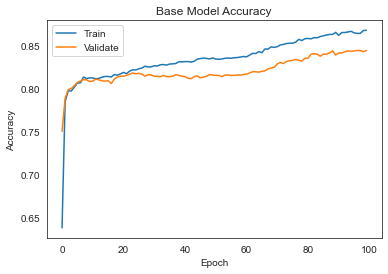

In [39]:
plt.plot(modHistory.history['binary_accuracy'])
plt.plot(modHistory.history['val_binary_accuracy'])
plt.title('Base Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

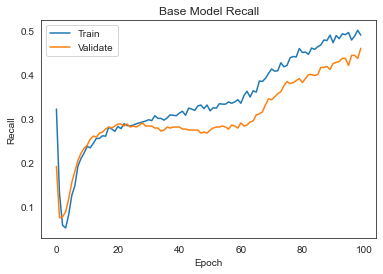

In [40]:
plt.plot(modHistory.history['recall'])
plt.plot(modHistory.history['val_recall'])
plt.title('Base Model Recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

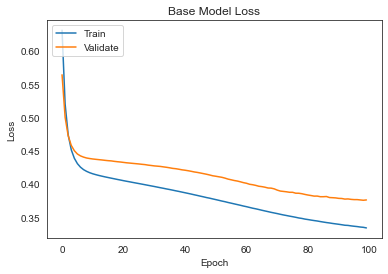

In [41]:
plt.plot(modHistory.history['binary_crossentropy'])
plt.plot(modHistory.history['val_binary_crossentropy'])
plt.title('Base Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

#### Randomized Search Cross Validation
1. Attempt to improve convergence of model in terms of:
    - Epoc count
    - Accuracy
    - Recall
    - Loss (binary_crossentropy)
2. Tune hyperparameters:
    - Hidden Layers (n_hidden_layer)
    - 1st hidden layer neuron count as a multiple of input layer (neuronMult)
    - Activation Function (activ1)
    - Learning Rate (l_rate)
    - How many neurons in subsequent hidden layers as a fraction of previous layer (neuFrac)

In [42]:
trape = X1_train.shape[1]
X1_train.shape, y_train.shape

((7000, 12), (7000,))

In [43]:
def build_model(n_hidden_layer=2, neuronMult=1, optim='SGD', activ1='tanh', #activ2on='sigmoid',
                l_rate=0.01, rand1=0.5, rand2=0.0, neuFrac=0.5):
    # create model
    model = tf.keras.Sequential()
    model.add(tf.keras.Input(shape=(trape,)))
    
    init0 = False
    for layer in range(1, n_hidden_layer+1):
        if init0 == False:
            model.add(tf.keras.layers.Dense(int(neuronMult*trape), activation=activ1))
            init0 = True
        else:
            model.add(tf.keras.layers.Dense(int(neuronMult*trape*(np.power(neuFrac, layer-1))), activation=activ1))#activ2on))

    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    # Optimizer for model
    optimiz = tf.keras.optimizers.Optimizer
    if optim == 'SGD':
        optimiz = tf.keras.optimizers.SGD(learning_rate=l_rate, momentum=rand2, nesterov=False, name='SGD') 
    if optim == 'RMSprop':
        optimiz = tf.keras.optimizers.RMSprop(learning_rate=l_rate, rho=0.9, momentum=rand2, centered=False, name='RMSprop')#, epsilon=1e-07

    # Compile model
    model.compile(optimizer=optimiz, loss='binary_crossentropy', 
                  metrics=[tf.keras.metrics.BinaryAccuracy(threshold=0.5), 
                       tf.keras.metrics.BinaryCrossentropy(),
                       tf.keras.metrics.Recall(thresholds=0.5), 
                       tf.keras.metrics.Precision(thresholds=0.5)])
    return model

In [44]:
from sklearn.base import clone
keras_class = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=build_model, epochs=100, batch_size=2000)
clone(keras_class)

In [45]:
keras_class.get_params().keys()

dict_keys(['epochs', 'batch_size', 'build_fn'])

In [46]:
# Build a pipeline with PowerTransformer and keras classifier
# ensuring specific scaling for each cross validation iteration
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer
annPipeL = Pipeline([('powTransY', PowerTransformer(method='yeo-johnson', standardize=True)), ("kerClass", keras_class)])

In [47]:
# Preserving the percentage of samples for each class
from sklearn.model_selection import StratifiedKFold
kf3 = StratifiedKFold(n_splits=3, shuffle=True, random_state=3)

In [48]:
from sklearn.model_selection import RandomizedSearchCV
param_distribs = {'kerClass__n_hidden_layer': [2, 3, 4], 
                  'kerClass__neuronMult': [1.5],
                  'kerClass__optim': ['SGD'],
                  'kerClass__activ1': ['sigmoid', 'tanh'],
                  'kerClass__l_rate': np.arange(0.002,0.012,0.002).tolist(),
                  'kerClass__neuFrac': [0.5, 0.66666]
                 }
rnd_search_cv = RandomizedSearchCV(annPipeL, param_distribs, n_iter=48, cv=kf3)
rnd_search_cv.fit(X1_train, y_train.values)

Epoch 1/100
3/3 [==============================] - 2s 3ms/step - loss: 0.5991 - binary_accuracy: 0.7954 - binary_crossentropy: 0.5991 - recall_1: 0.0000e+00 - precision_1: 0.0000e+00
Epoch 2/100
3/3 [==============================] - 0s 5ms/step - loss: 0.5957 - binary_accuracy: 0.7975 - binary_crossentropy: 0.5957 - recall_1: 0.0000e+00 - precision_1: 0.0000e+00
Epoch 3/100
3/3 [==============================] - 0s 4ms/step - loss: 0.5939 - binary_accuracy: 0.7960 - binary_crossentropy: 0.5939 - recall_1: 0.0000e+00 - precision_1: 0.0000e+00
Epoch 4/100
3/3 [==============================] - 0s 4ms/step - loss: 0.5925 - binary_accuracy: 0.7935 - binary_crossentropy: 0.5925 - recall_1: 0.0000e+00 - precision_1: 0.0000e+00
Epoch 5/100
3/3 [==============================] - 0s 4ms/step - loss: 0.5894 - binary_accuracy: 0.7953 - binary_crossentropy: 0.5894 - recall_1: 0.0000e+00 - precision_1: 0.0000e+00
Epoch 6/100
3/3 [==============================] - 0s 5ms/step - loss: 0.5879 - binar

3/3 [==============================] - 0s 4ms/step - loss: 0.5359 - binary_accuracy: 0.7957 - binary_crossentropy: 0.5359 - recall_1: 0.0000e+00 - precision_1: 0.0000e+00
Epoch 45/100
3/3 [==============================] - 0s 4ms/step - loss: 0.5310 - binary_accuracy: 0.8010 - binary_crossentropy: 0.5310 - recall_1: 0.0000e+00 - precision_1: 0.0000e+00
Epoch 46/100
3/3 [==============================] - 0s 5ms/step - loss: 0.5339 - binary_accuracy: 0.7964 - binary_crossentropy: 0.5339 - recall_1: 0.0000e+00 - precision_1: 0.0000e+00
Epoch 47/100
3/3 [==============================] - 0s 4ms/step - loss: 0.5339 - binary_accuracy: 0.7954 - binary_crossentropy: 0.5339 - recall_1: 0.0000e+00 - precision_1: 0.0000e+00
Epoch 48/100
3/3 [==============================] - 0s 4ms/step - loss: 0.5300 - binary_accuracy: 0.7994 - binary_crossentropy: 0.5300 - recall_1: 0.0000e+00 - precision_1: 0.0000e+00
Epoch 49/100
3/3 [==============================] - 0s 5ms/step - loss: 0.5308 - binary_accur

3/3 [==============================] - 0s 4ms/step - loss: 0.5148 - binary_accuracy: 0.7974 - binary_crossentropy: 0.5148 - recall_1: 0.0000e+00 - precision_1: 0.0000e+00
Epoch 88/100
3/3 [==============================] - 0s 4ms/step - loss: 0.5134 - binary_accuracy: 0.7985 - binary_crossentropy: 0.5134 - recall_1: 0.0000e+00 - precision_1: 0.0000e+00
Epoch 89/100
3/3 [==============================] - 0s 6ms/step - loss: 0.5191 - binary_accuracy: 0.7927 - binary_crossentropy: 0.5191 - recall_1: 0.0000e+00 - precision_1: 0.0000e+00
Epoch 90/100
3/3 [==============================] - 0s 5ms/step - loss: 0.5115 - binary_accuracy: 0.7998 - binary_crossentropy: 0.5115 - recall_1: 0.0000e+00 - precision_1: 0.0000e+00
Epoch 91/100
3/3 [==============================] - 0s 6ms/step - loss: 0.5119 - binary_accuracy: 0.7992 - binary_crossentropy: 0.5119 - recall_1: 0.0000e+00 - precision_1: 0.0000e+00
Epoch 92/100
3/3 [==============================] - 0s 6ms/step - loss: 0.5139 - binary_accur

ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

In [ ]:
rnd_search_cv.best_params_

## Prediction at 0.5 Threshold

#### Model Tweaked by RandomizedSearchCV results comparison with base model
1. Use RandomizedSearchCV Best Parameters for final model
2. Cater for imbalanced Exited class distribution with weight adjustments weights = {0:1, 1:5}

In [ ]:
weights = {0:1, 1:4}

In [ ]:
optim='SGD'
neuronMult=1.5
neuFrac=0.5
n_hidden_layer=2
l_rate=0.008
activ1='tanh'
rand1=0.5
rand2=0.0

# Create model
annClass = tf.keras.Sequential()
annClass.add(tf.keras.Input(shape=(trape,)))

init0 = False
for layer in range(1, n_hidden_layer+1):
    if init0 == False:
        annClass.add(tf.keras.layers.Dense(int(neuronMult*trape), activation=activ1))
        init0 = True
    else:
        annClass.add(tf.keras.layers.Dense(int(neuronMult*trape*(np.power(neuFrac, layer-1))), activation=activ1))

annClass.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Optimizer for model
optimiz = tf.keras.optimizers.Optimizer
if optim == 'SGD':
    optimiz = tf.keras.optimizers.SGD(learning_rate=l_rate, momentum=rand2, name='SGD')# nesterov=False, 
if optim == 'RMSprop':
    optimiz = tf.keras.optimizers.RMSprop(learning_rate=l_rate, rho=0.9, momentum=rand2, name='RMSprop')#, epsilon=1e-07, centered=False,

# Compile model
annClass.compile(optimizer=optimiz, loss='binary_crossentropy', metrics=['accuracy',
                                                                        tf.keras.metrics.BinaryCrossentropy(),
                                                                        tf.keras.metrics.Recall(thresholds=0.5),
                                                                        tf.keras.metrics.Precision(thresholds=0.5)])

In [ ]:
# Print model summary
annClass.summary()

#### Model Tweaked by RandomizedSearchCV validation metrics "annHist" comparison with base model

In [ ]:
annHist = annClass.fit(X0_train1, y0_train.values, epochs=100, validation_data=(X0_valid1, y0_valid.values), class_weight=weights, verbose=True) #, batch_size = 1000, callbacks=[tensorboard_cb]

In [ ]:
# List all data in history
print(annHist.history.keys())

In [ ]:
plt.plot(annHist.history['binary_accuracy'])
plt.plot(annHist.history['val_binary_accuracy'])
plt.title('Model Tweaked by RandomizedSearchCV Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
plt.plot(annHist.history['recall_146'])
plt.plot(annHist.history['val_recall_146'])
plt.title('Model Tweaked by RandomizedSearchCV Recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
plt.plot(annHist.history['binary_crossentropy'])
plt.plot(annHist.history['val_binary_crossentropy'])
plt.title('Model Tweaked by RandomizedSearchCV Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
res_DF = pd.DataFrame(columns=annClass.metrics_names)
res_DF.loc[0] = np.array(results)
res_DF

## Model Performance Evaluation

#### Predicting Test data

In [ ]:
results = annClass.evaluate(X1_test, y_test.values)

In [ ]:
y_pred = (annClass.predict(X1_test) > 0.5).astype('int32')
tf.math.confusion_matrix(y_test, y_pred, num_classes=2)

#### Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
print('           ANN Confusion Matrix')
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels = [0,1] , yticklabels = [0,1] )
plt.ylabel('Observed')
plt.xlabel('Predicted')
plt.show()

In [ ]:
TP = 458
FP = 491
FN = 161
TN = 1890

Recall = TP/(TP+FN)
Precision = TP/(TP+FP)
print('Recall [TP/(TP+FN)] for ANN Model = {0:.2f}'.format(Recall))
print('Precision [TP/(TP+FP)] for ANN Model = {0:.2f}'.format(Precision))
print('F1 Score [2.Precision.Recall / (Precision + Recall)] for ANN Model = {0:.2f}'.format((2*Recall*Precision)/(Recall+Precision)))
print('Accuracy [(TP+TN)/(TP+TN+FP+FN)] for ANN Model = {0:.2f}'.format((TP+TN)/(TP+TN+FP+FN)))

#### FInal Model Evaluation
1. The Final Model Accuracy based on 3 Fold cross validation of hyperparameters has produced:
    - Recall score of 0.74 on test data, which is good as Exited customers are identified pretty well. A better score can be achieved with greater amount of data, which results in better neural network model performance
    - Accuracy of 0.78 on test data, which is good because the model classifed correctly 78% of customers that Exited and those who stayed
    - 3 hidden layers, resulting in it learning some complex relationships in parameters
    - 1st hidden layer with 1.5 times the number of neurons compared to input layer, thereby creating equivalent of polynomial features to learn better
2. Base Model Accuracy on validation data appears better than Final Model on validation data, however:
    - Balancing the Exited class distribution with weight adjustments weights {0:1, 1:4} led to the Final Model having a better Recall value on validation data
    - Final Model is expedted to generalise well in production, due to cross validation exercise
    - Final Model Accuracy converges faster at about 40 epochs, compared to 60 epochs of the Base Model, which means faster learning of the cross validated & weight balanced model